# 🌿 📈 From Scratch: Linear Regression Using OOP

## Hey there!

In this notebook, I’m going to show you how to implement **Linear Regression** from scratch using **Object-Oriented Programming (OOP)**. Now, before we dive in, I want to be clear about something important: **you really need to understand OOP to get the most out of this**. 

### Why OOP is Important

If you’re not familiar with things like **classes**, **objects**, and other OOP concepts, you might find this a bit challenging. That’s okay! But I highly recommend learning the basics of OOP first. It’s a must-have skill not just for this, but for many machine learning models and libraries. Seriously, mastering OOP will help you write better, more **structured** and **reusable** code—and it’s everywhere in machine learning.

If you're still new to OOP, it’s totally worth taking the time to learn it before diving deep into machine learning. Trust me, it’ll make everything click much faster!

### What You'll Get Here

This is a **simplified version** of what I usually teach in my class. The goal is to make it easy to understand while still showing you how powerful OOP can be when implementing algorithms like linear regression. So, let’s roll up our sleeves and get started!


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
class LinearRegression:
    """
    LinearRegression class implements a linear regression model using either closed-form solution or gradient descent for optimization.
    
    Attributes:
    -----------
    method : str
        The optimization method to use ('closed_form' or 'gradient_descent').
    learning_rate : float
        The step size for gradient descent updates (only used if method is 'gradient_descent').
    epochs : int
        The number of iterations for training (only used if method is 'gradient_descent').
    tolerance : float
        The minimum change in the loss function to continue training (only used if method is 'gradient_descent').
    verbose : int
        If set to 1, prints progress during training. If set to 2, prints detailed progress (only used if method is 'gradient_descent').
    penalty : str
        The type of regularization penalty to use ('none', 'l1', 'l2', 'elasticnet').
    alpha : float
        The regularization strength.
    l1_ratio : float
        The mixing ratio for Elastic Net (only used if penalty is 'elasticnet').
    coef_ : numpy array
        The learned weights (including the intercept).
    loss_history_ : list
        The history of the loss values during training (only used if method is 'gradient_descent').
    r2_score_ : float
        The R² score of the model.
    
    Methods:
    --------
    fit(X, y):
        Trains the linear regression model using the specified optimization method.
    predict(X):
        Makes predictions using the learned weights.
    _predict_internal(X):
        Internal method to make predictions using the learned weights.
    _compute_gradients(X, y, predictions):
        Computes the gradients for the weights (only used if method is 'gradient_descent').
    _update_weights(gradients):
        Updates the weights using the computed gradients (only used if method is 'gradient_descent').
    _calculate_mse(y, predictions):
        Calculates the Mean Squared Error (MSE) loss.
    _calculate_penalty():
        Calculates the regularization penalty.
    score(X, y):
        Calculates the R² score to evaluate the model's performance.
    plot_learning_curve():
        Plots the learning curve of the training process (only used if method is 'gradient_descent').
    __repr__():
        Returns a string representation of the LinearRegression instance.
    """
    
    def __init__(self, method='gradient_descent', learning_rate=0.01, epochs=1000, tolerance=1e-6, verbose=0, penalty='none', alpha=0.1, l1_ratio=0.5):
        # Initialize the LinearRegression model with the specified parameters
        self.method = method
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tolerance = tolerance
        self.verbose = verbose
        self.penalty = penalty
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.coef_ = None  # Model weights (including the intercept)
        self.loss_history_ = []  # Keeps track of loss during gradient descent
        self.r2_score_ = None  # Stores the R² score of the model after fitting

    def fit(self, X, y):
        """
        Trains the linear regression model using the specified optimization method.
        X: input features, y: target values.
        """
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept term (bias) to X
        
        if self.method == 'closed_form':
            self._fit_closed_form(X, y)  # Closed-form solution (normal equation)
        elif self.method == 'gradient_descent':
            self._fit_gradient_descent(X, y)  # Gradient descent method
        else:
            raise ValueError("Invalid method. Choose 'closed_form' or 'gradient_descent'.")
                
    def _fit_closed_form(self, X, y):
        """
        Train the model using the closed-form solution (Normal Equation):
        θ = (XᵀX)^(-1)Xᵀy
        """
        if self.penalty == 'none':
            self.coef_ = np.linalg.pinv(X.T @ X) @ X.T @ y  # Calculate weights without regularization
        elif self.penalty == 'l2':
            I = np.eye(X.shape[1])  # Identity matrix for regularization term
            I[0, 0] = 0  # Do not regularize the intercept term (bias)
            # L2 Regularization (Ridge): θ = (XᵀX + αI)^(-1)Xᵀy
            self.coef_ = np.linalg.pinv(X.T @ X + self.alpha * I) @ X.T @ y
        else:
            raise ValueError("Closed-form solution only supports 'none' and 'l2' penalties.")
    
    def _fit_gradient_descent(self, X, y):
        """
        Train the model using gradient descent.
        Update rule: θ = θ - α * ∇J(θ)
        """
        n_samples, n_features = X.shape
        self.coef_ = np.random.randn(n_features, 1)  # Initialize weights randomly
        
        for epoch in range(self.epochs):
            predictions = self._predict_internal(X)  # Model predictions: ŷ = Xθ
            mse = self._calculate_mse(y, predictions)  # Calculate MSE: J(θ) = (1/n) Σ(yᵢ - ŷᵢ)²
            penalty = self._calculate_penalty()  # Regularization penalty (if applicable)
            total_loss = mse + penalty  # Total loss = MSE + regularization
            self.loss_history_.append(total_loss)  # Store loss history
            gradients = self._compute_gradients(X, y, predictions)  # Compute gradient ∇J(θ)
            self._update_weights(gradients)  # Update weights θ = θ - α∇J(θ)
            r2_score = self.score(X[:, 1:], y)  # Compute R² score
            
            # Verbose output to monitor progress
            if self.verbose == 1 and epoch % 50 == 0:
                print(f'Epoch {epoch}, MSE Loss: {mse:.4f}, Penalty: {penalty:.4f}, Total Loss: {total_loss:.4f}, R² Score: {r2_score:.4f}')
            elif self.verbose == 2:
                print(f'Epoch {epoch}, MSE Loss: {mse:.4f}, Penalty: {penalty:.4f}, Total Loss: {total_loss:.4f}, R² Score: {r2_score:.4f}')
                print(f'Weights: {self.coef_.flatten()}')
                print(f'Gradients: {gradients.flatten()}')
            
            # Early stopping condition if loss change is below tolerance
            if epoch > 0 and abs(self.loss_history_[-2] - self.loss_history_[-1]) < self.tolerance:
                if self.verbose > 0:
                    print(f"Early stopping at epoch {epoch} due to small change in loss.")
                break
        
        self.plot_learning_curve()  # Plot the learning curve after training
                
    def predict(self, X):
        """
        Make predictions using the learned weights.
        ŷ = Xθ
        """
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept term to input data
        return self._predict_internal(X)
    
    def _predict_internal(self, X):
        """
        Internal method to make predictions using the learned weights.
        """
        return X @ self.coef_  # Predicted values: ŷ = Xθ
    
    def _compute_gradients(self, X, y, predictions):
        """
        Compute the gradients for the weights:
        ∇J(θ) = (2/n) * Xᵀ(Xθ - y)
        """
        n_samples = X.shape[0]
        error = predictions - y  # Error: (Xθ - y)
        gradients = 2 * (X.T @ error) / n_samples  # Gradient for MSE
        
        # Add regularization gradients for L2 or Elastic Net
        if self.penalty == 'l2' or self.penalty == 'elasticnet':
            gradients += 2 * self.alpha * self.coef_
        # Add regularization gradients for L1 or Elastic Net
        if self.penalty == 'l1' or self.penalty == 'elasticnet':
            gradients += self.alpha * self.l1_ratio * np.sign(self.coef_)
        
        return gradients
    
    def _update_weights(self, gradients):
        """
        Update the weights using the computed gradients:
        θ = θ - α * ∇J(θ)
        """
        self.coef_ -= self.learning_rate * gradients  # Gradient descent update rule
    
    def _calculate_mse(self, y, predictions):
        """
        Calculate the Mean Squared Error (MSE):
        J(θ) = (1/n) Σ(yᵢ - ŷᵢ)²
        """
        return np.mean((y - predictions) ** 2)
    
    def _calculate_penalty(self):
        """
        Calculate the regularization penalty term:
        - L2 penalty: α * Σθ²
        - L1 penalty: α * Σ|θ|
        - ElasticNet: α * (l1_ratio * Σ|θ| + (1 - l1_ratio) * Σθ²)
        """
        if self.penalty == 'l2':
            return self.alpha * np.sum(self.coef_ ** 2)
        elif self.penalty == 'l1':
            return self.alpha * np.sum(np.abs(self.coef_))
        elif self.penalty == 'elasticnet':
            l1_penalty = self.alpha * self.l1_ratio * np.sum(np.abs(self.coef_))
            l2_penalty = self.alpha * (1 - self.l1_ratio) * np.sum(self.coef_ ** 2)
            return l1_penalty + l2_penalty
        else:
            return 0
    
    def score(self, X, y):
        """
        Calculate the R² score:
        R² = 1 - (Σ(y - ŷ)² / Σ(y - ȳ)²)
        """
        X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept term to input data
        predictions = self._predict_internal(X)  # Model predictions
        ss_res = np.sum((y - predictions) ** 2)  # Sum of squared residuals
        ss_tot = np.sum((y - y.mean()) ** 2)  # Total sum of squares
        return 1 - (ss_res / ss_tot)  # R² score calculation
    
    def plot_learning_curve(self):
        """
        Plot the learning curve of the training process.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(self.loss_history_, label='Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error (MSE)')
        plt.title('Learning Curve')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def __repr__(self):
        """
        Returns a string representation of the LinearRegression instance.
        """
        return f'LinearRegression(method={self.method}, learning_rate={self.learning_rate}, epochs={self.epochs}, tolerance={self.tolerance}, penalty={self.penalty}, alpha={self.alpha}, l1_ratio={self.l1_ratio})'


Epoch 0, MSE Loss: 5332.7560, Penalty: 0.0000, Total Loss: 5332.7560, R² Score: -0.0152
Epoch 50, MSE Loss: 1505.5927, Penalty: 0.0000, Total Loss: 1505.5927, R² Score: 0.7078
Epoch 100, MSE Loss: 1026.4146, Penalty: 0.0000, Total Loss: 1026.4146, R² Score: 0.7984
Epoch 150, MSE Loss: 964.2299, Penalty: 0.0000, Total Loss: 964.2299, R² Score: 0.8101
Epoch 200, MSE Loss: 955.8347, Penalty: 0.0000, Total Loss: 955.8347, R² Score: 0.8117
Epoch 250, MSE Loss: 954.6544, Penalty: 0.0000, Total Loss: 954.6544, R² Score: 0.8119
Epoch 300, MSE Loss: 954.4820, Penalty: 0.0000, Total Loss: 954.4820, R² Score: 0.8120
Epoch 350, MSE Loss: 954.4559, Penalty: 0.0000, Total Loss: 954.4559, R² Score: 0.8120
Epoch 400, MSE Loss: 954.4518, Penalty: 0.0000, Total Loss: 954.4518, R² Score: 0.8120
Epoch 450, MSE Loss: 954.4512, Penalty: 0.0000, Total Loss: 954.4512, R² Score: 0.8120
Early stopping at epoch 493 due to small change in loss.


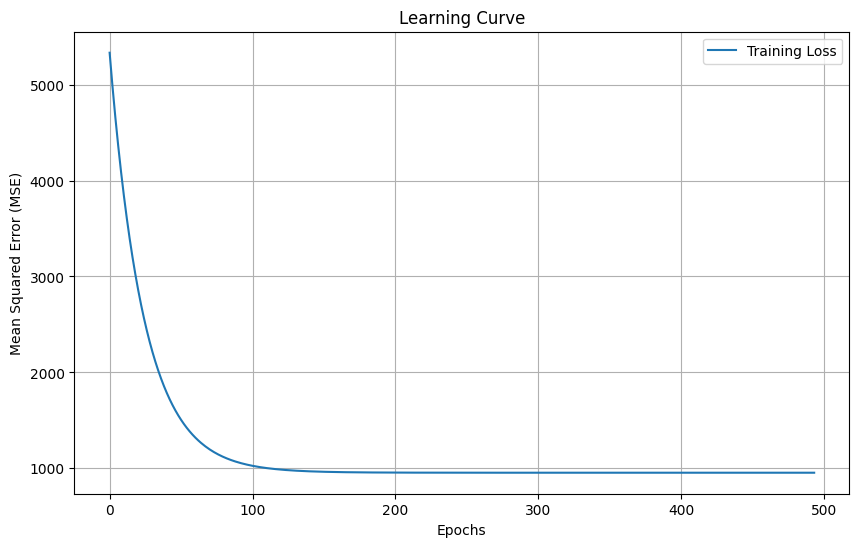

In [3]:
# Generate a random regression problem using sklearn's make_regression
X, y = make_regression(n_samples=1000, n_features=5, noise=30, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape y to make it a column vector
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Initialize the custom LinearRegression model using gradient descent
model = LinearRegression(method='gradient_descent', learning_rate=0.01, epochs=1000, verbose=1, penalty='none')

# Train the model on the training data
model.fit(X_train, y_train)


In [4]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model by calculating the R² score
r2_score = model.score(X_test, y_test)

# Print the R² score
print(f"R² Score on Test Set: {r2_score:.4f}")

R² Score on Test Set: 0.7910


## Wrapping Up

Thank you for following along with this implementation of **Linear Regression using OOP** from scratch! I hope you found it helpful in understanding both the algorithm and the importance of **Object-Oriented Programming** in structuring machine learning code.

Please feel free to ask any questions or if something wasn't clear, drop a comment! Also, I would love to hear your feedback, so don’t hesitate to share any thoughts or suggestions you might have.

Happy coding and learning! 😊
